In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

In [25]:
diabetes = load_diabetes()

In [26]:
df_X = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
df_y = pd.Series(data=diabetes.target, name='target')
print("df_X shape:", df_X.shape)
print("df_y shape:", df_y.shape)

df_X shape: (442, 10)
df_y shape: (442,)


In [27]:
X_array = df_X.values
y_array = df_y.values
print("X_array shape:", X_array.shape)
print("y_array shape:", X_array.shape)

X_array shape: (442, 10)
y_array shape: (442, 10)


In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_array, y_array, test_size=0.2, random_state=42)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (353, 10)
X_test shape: (89, 10)
y_train shape: (353,)
y_test shape: (89,)


In [29]:
W = np.random.rand(10)
b = np.random.rand()

In [30]:
def model(X, W, b):
    predictions = 0
    for i in range(10):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions

In [31]:
def MSE(a, b):
    mse = ((a - b) ** 2).mean()
    return mse

In [32]:
def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L

In [33]:
def gradient(X, W, b, y):
    # N은 데이터 포인트의 개수
    N = len(y)

    # y_pred 준비
    y_pred = model(X, W, b)

    # 공식에 맞게 gradient 계산
    dW = 1/N * 2 * X.T.dot(y_pred - y)

    # b의 gradient 계산
    db = 2 * (y_pred - y).mean()
    return dW, db

In [37]:
LEARNING_RATE = 0.07
losses = []

for i in range(1, 5000):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 100 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 100 : Loss 2931.8697
Iteration 200 : Loss 2930.0641
Iteration 300 : Loss 2928.3632
Iteration 400 : Loss 2926.7605
Iteration 500 : Loss 2925.2498
Iteration 600 : Loss 2923.8256
Iteration 700 : Loss 2922.4824
Iteration 800 : Loss 2921.2151
Iteration 900 : Loss 2920.0193
Iteration 1000 : Loss 2918.8904
Iteration 1100 : Loss 2917.8244
Iteration 1200 : Loss 2916.8176
Iteration 1300 : Loss 2915.8662
Iteration 1400 : Loss 2914.9670
Iteration 1500 : Loss 2914.1169
Iteration 1600 : Loss 2913.3128
Iteration 1700 : Loss 2912.5521
Iteration 1800 : Loss 2911.8322
Iteration 1900 : Loss 2911.1506
Iteration 2000 : Loss 2910.5052
Iteration 2100 : Loss 2909.8937
Iteration 2200 : Loss 2909.3143
Iteration 2300 : Loss 2908.7650
Iteration 2400 : Loss 2908.2442
Iteration 2500 : Loss 2907.7501
Iteration 2600 : Loss 2907.2812
Iteration 2700 : Loss 2906.8361
Iteration 2800 : Loss 2906.4134
Iteration 2900 : Loss 2906.0118
Iteration 3000 : Loss 2905.6303
Iteration 3100 : Loss 2905.2675
Iteration 3200 : 

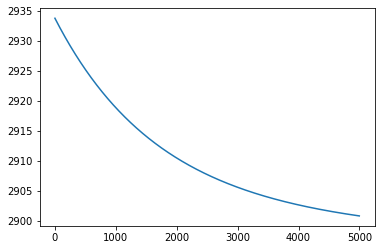

In [38]:
plt.plot(losses)
plt.show()

In [43]:
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
print(mse) #MSE 값
print(np.sqrt(mse)) #RMSE 값

2875.3477521015093
53.622269180831104


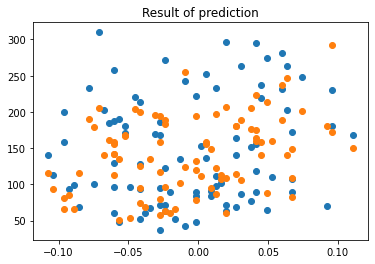

In [45]:
plt.title('Result of prediction')
plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], prediction)
plt.show()